<a href="https://colab.research.google.com/github/xBrymer/TensorFlow-Basics/blob/master/Letter_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install extra-keras-datasets


  Created wheel for extra-keras-datasets: filename=extra_keras_datasets-0.1.7-cp36-none-any.whl size=7311 sha256=2dea8ce21cd9230f94d8cb4dab6c3841bb4f8da49dfee9e4c0c3e151141c251e
  Stored in directory: /root/.cache/pip/wheels/8a/04/95/e8f214025c2e40d5618a443e4ea09df0031050b35460ea007c
Successfully built extra-keras-datasets


In [1]:
from extra_keras_datasets import emnist

In [2]:
(input_train, target_train), (input_test, target_test) = emnist.load_data(type='letters')

In [3]:
from tensorflow import keras
from keras.utils import to_categorical

import tensorflow as tf
import matplotlib.pyplot as plt

from random import randint


In [4]:
target_train_OH, target_test_OH = to_categorical(target_train), to_categorical(target_test)

In [5]:
alphabet = {chr(i+96):i for i in range(1,27)}

In [6]:
print(alphabet)

{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26}


In [7]:
def get_key(val):
  for key, value in alphabet.items():
    if val == value:
      return key

This is letter s.


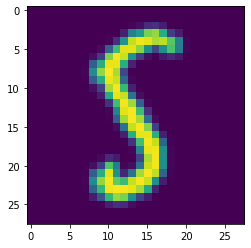

In [8]:
n = randint(0,10000)

plt.imshow(input_train[n])
letter = get_key(target_train[n])
print(f'This is letter {letter}.')

In [9]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Activation, BatchNormalization, Flatten

import numpy as np

In [10]:
np.shape(input_test)

(20800, 28, 28)

In [11]:
input_train = np.reshape(input_train, (124800, 28, 28, 1))
input_test = np.reshape(input_test, (20800, 28, 28, 1))

In [13]:
np.shape(input_test)

(20800, 28, 28, 1)

In [14]:
model = Sequential()
model.add(Conv2D(32, input_shape = (28,28,1), kernel_size= 3, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.10))
model.add(Conv2D(64, kernel_size= 3, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Conv2D(128, kernel_size= 3, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(27, activation = 'relu'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 64)        256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 128)       7

In [16]:
input_train, input_test = input_train/255, input_test/255

In [17]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics =  ['accuracy'])

In [18]:
history = model.fit(input_train, target_train_OH, epochs = 20, validation_data = (input_test, target_test_OH))

Epoch 1/20
3900/3900 [==============================] - 61s 16ms/step - loss: 3.1707 - accuracy: 0.5700 - val_loss: 2.2284 - val_accuracy: 0.6550
Epoch 2/20
3900/3900 [==============================] - 61s 16ms/step - loss: 1.7182 - accuracy: 0.7293 - val_loss: 1.8083 - val_accuracy: 0.7361
Epoch 3/20
3900/3900 [==============================] - 59s 15ms/step - loss: 1.5431 - accuracy: 0.7662 - val_loss: 1.5981 - val_accuracy: 0.6913
Epoch 4/20
3900/3900 [==============================] - 59s 15ms/step - loss: 1.5160 - accuracy: 0.7646 - val_loss: 1.4520 - val_accuracy: 0.8021
Epoch 5/20
3900/3900 [==============================] - 59s 15ms/step - loss: 1.5501 - accuracy: 0.7625 - val_loss: 1.5492 - val_accuracy: 0.7814
Epoch 6/20
3900/3900 [==============================] - 59s 15ms/step - loss: 1.3946 - accuracy: 0.7681 - val_loss: 1.0867 - val_accuracy: 0.8110
Epoch 7/20
3900/3900 [==============================] - 58s 15ms/step - loss: 1.3782 - accuracy: 0.7766 - val_loss: 1.1374 -

In [22]:
from google.colab import drive 
drive.mount('/content/gdrive', force_remount= True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [23]:
cd '/content/gdrive/My Drive/External Datasets'

/content/gdrive/My Drive/External Datasets


In [24]:
model.save('EMNIST-letter-recognition.h5')

In [26]:
probability_model = tf.keras.Sequential([
  model, tf.keras.layers.Softmax()
])

In [30]:
predictions = probability_model(input_test[:8000])

In [41]:
def predict(index):
  plt.imshow(np.reshape(input_test[index], (28,28)))
  
  class_prediction = get_key(np.argmax(predictions[index]))
  print()

  print(f'I predict that this is letter - {class_prediction}'),
  return
        


I predict that this is letter - b


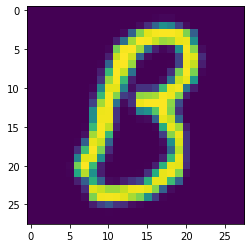

In [57]:
from random import randint

n = randint(0,8000)

predict(n)